### Regresión lineal simple

In [1]:
# Importamos las librerías a emplear
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Temas de Jupyter para fondo negro
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

# Por si no se nos autocompleta el código
%config IPCompleter.greedy=True

In [2]:
# Cargamos el archivo .csv
data = pd.read_csv(r"D:\Curso-Jupyter-Notebook\GitHub\python-ml-course\datasets\ads\Advertising.csv")
data.head() # Visualizamos los primeros 5 datos

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# Creamos un modelo lineal
import statsmodels.formula.api as smf

In [5]:
# Creamos el modelo lineal
lm = smf.ols(formula = "Sales~TV", data = data).fit()

In [6]:
lm.params # Parámetros de nuestro modelo
# Se concluye lo siguiente:
# Un incremento en 100 unidades de publicidad en TV implica una 4.7 ventas adicionales

Intercept    7.032594
TV           0.047537
dtype: float64

Modelo predictivo: 7.032594 + 0.047537xTV

In [7]:
# Hallamos los p-valores (F-statistic)
lm.pvalues
# Si el p-valor es menor que el nivel de significación, rechazamos la hipótesis nula
# y aceptamos que existe una relación lineal entre nuestras variables

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [8]:
# Hallamos el R^2 (suma de los cuadrados totales) - eficacia del modelo
lm.rsquared

0.611875050850071

In [9]:
# Hallamos el R^2 ajustado
lm.rsquared_adj

0.6099148238341623

In [10]:
# Visión general del modelo lineal creado
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 25 Dec 2021   Prob (F-statistic):           1.47e-42
Time:                        21:29:52   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Generamos un dataframe con una columna del dataframe anterior
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred # Valores predictivos

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

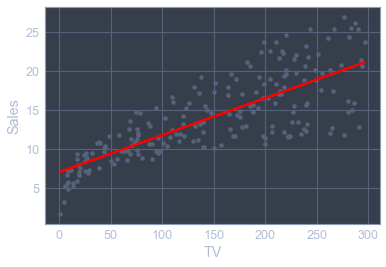

In [12]:
# Evaluación de nuestro modelo predictivo
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y = "Sales") # scatter -> nube de puntos
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c = "red", linewidth = 2)

In [13]:
# Modelo de regresión lineal
data["sales_pred"] = 7.032594 + 0.047537*data["TV"]

In [21]:
# RSE -> Error estándar residual
data["RSE"] = (data["Sales"] - data["sales_pred"])**2

# Suma de los cuadrados de la diferencia
SSD = sum(data["RSE"])

# Error estándar residual
RSE = np.sqrt(SSD/(len(data) - 2))
RSE

3.258656369238098

In [17]:
# Promedio de ventas
sales_m = np.mean(data["Sales"])
sales_m

14.0225

In [18]:
# Error promedio
error = RSE/sales_m
error

0.23238768901680143

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

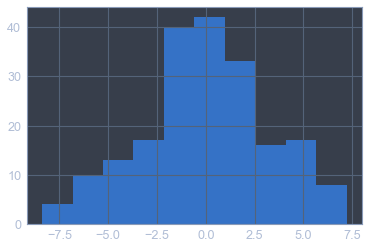

In [19]:
# Histograma de la distribución de errores respecto al modelo
# Observamos una distribución normal, aproximadamente
plt.hist((data["Sales"] - data["sales_pred"]))

### Regresión lineal múltiple

In [24]:
# Añadimos el Newspaper al modelo existente
lm2 = smf.ols(formula = "Sales~TV+Newspaper", data = data).fit()

In [26]:
# Parámetros de nuestro segundo modelo lineal
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

Modelo predictivo: 5.774948 + 0.046901xTV + 0.044219xNewspaper

In [27]:
# Hallamos los p-valores
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [28]:
# Hallamos el R^2
# Notamos que R^2 a aumentado, eso es bueno
lm2.rsquared

0.6458354938293271

In [29]:
# Hallamos el R^2 ajustado
lm2.rsquared_adj

0.6422399150864777

In [31]:
# Predicciones del modelo creado: ventas respecto a TV y Newspaper
sales_pred = lm2.predict(data[["TV", "Newspaper"]])
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [32]:
# Desviación estándar de los residuos
SSD = sum((data["Sales"] - sales_pred)**2)
SSD

1918.5618118968275

In [34]:
# Error estándar residual
RSE = np.sqrt(SSD/(len(data) - 2 - 1))
RSE

3.1207198602528856

In [35]:
# Errorpromedio
error = RSE/sales_m
error

0.22255089037282122

In [36]:
# Visión general del modelo lineal creado
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sat, 25 Dec 2021   Prob (F-statistic):           3.95e-45
Time:                        22:10:53   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Ahora probamos añandiendo la radio al modelo existente
lm3 = smf.ols(formula = "Sales~TV+Radio", data = data).fit()

In [39]:
# Visión general del modelo lineal creado
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 25 Dec 2021   Prob (F-statistic):           4.83e-98
Time:                        22:12:02   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Predicciones del modelo creado: ventas respecto a TV y Radio
sales_pred = lm3.predict(data[["TV", "Radio"]])

# Desviación estándar de los residuos
SSD = sum((data["Sales"] - sales_pred)**2)

# Error estándar residual
RSE = np.sqrt(SSD/(len(data) - 2 - 1))
RSE

1.6813609125080007

In [44]:
# Error promedio
error = RSE/sales_m
error

0.11990450436855059

In [45]:
# Finalmente evaluamos un modelo lineal múltiple que incluya todos los factores
lm4 = smf.ols(formula = "Sales~TV+Radio+Newspaper", data = data).fit()

In [46]:
# Visión general del modelo lineal creado
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 25 Dec 2021   Prob (F-statistic):           1.58e-96
Time:                        22:17:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Predicciones del modelo creado: ventas respecto a TV, Radio y Newspaper
sales_pred = lm4.predict(data[["TV", "Radio", "Newspaper"]])

# Desviación estándar de los residuos
SSD = sum((data["Sales"] - sales_pred)**2)

# Error estándar residual
RSE = np.sqrt(SSD/(len(data) - 3 - 1))
RSE

1.6855103734147439

In [48]:
# Error promedio
error = RSE/sales_m
error

0.12020041885646238

### Multicolinealidad

Factor inflación de la varianza
- VIF = 1: Las variables no están correlacionadas
- VIF < 5: Las variables tienen una correlación moderada y pueden quedarse en el modelo
- VIF > 5: Las variables están altísimamente correlacionadas y deben desaparecer del modelo

In [51]:
# Newspaper ~ TV + Radio -> R^2 | VIF = 1/(1-R^2)
lm_n = smf.ols(formula = "Newspaper~TV+Radio", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1 - rsquared_n)
VIF

1.1451873787239286

In [54]:
# TV ~ Newspaper + Radio -> R^2 | VIF = 1/(1-R^2)
lm_n = smf.ols(formula = "TV~Newspaper+Radio", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1 - rsquared_n)
VIF
# Conclusión: TV no está correlacionada con los demás factores

1.00461078493965

In [56]:
# Radio ~ TV + Newspaper -> R^2 | VIF = 1/(1-R^2)
lm_n = smf.ols(formula = "Radio~TV+Newspaper", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1 - rsquared_n)
VIF
# Podemos observar que Radio y Newspaper tienen prácticamente el mismo VIF
# significa que ambas están correlacionadas, sin incluir la TV
# Sin embargo el modelo realizado con TV y Radio es superior a los demás modelos
# El modelo con las 3 variables predictorias no mejora

1.1449519171055353

In [57]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 25 Dec 2021   Prob (F-statistic):           4.83e-98
Time:                        22:39:42   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""